# Interpolation GeoPlots

> These plots are created to plot the results of interpolation over a space for a perticular timestamp. You need to provide shape files and a data frame containing the pollutant levels. The function internally uses `polire`, a library built for interpolation to interpolate the values for the whole region and then forms a contour map of the results.

Standard libraries to be imported for usage

In [2]:
#! /usr/bin/env python
from geopandas import GeoDataFrame
import pandas as pd
import matplotlib.pyplot as plt
from vayu import interpolPlot

In [4]:
"""data files
shape files:
https://www2.census.gov/geo/tiger/TIGER2017/STATE/

data files:
https://aqs.epa.gov/aqsweb/airdata/daily_44201_2019.zip
https://openaq.org/#/countries/IN?_k=j7c7ka
"""
shapeFile = "../data/shapeFiles/tl_2017_us_state.shp"
datafile = "../data/shapeFiles/daily_44201_2018.csv"
long = "Longitude"
lat = "Latitude"
pollutant = "Arithmetic Mean"
df = pd.read_csv(datafile)
shape_df = GeoDataFrame.from_file(shapeFile)
shape_df.drop(shape_df.index[[34, 35, 36, 40, 41, 49, 31]], 
              inplace=True)

/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
No handles with labels found to put in legend.


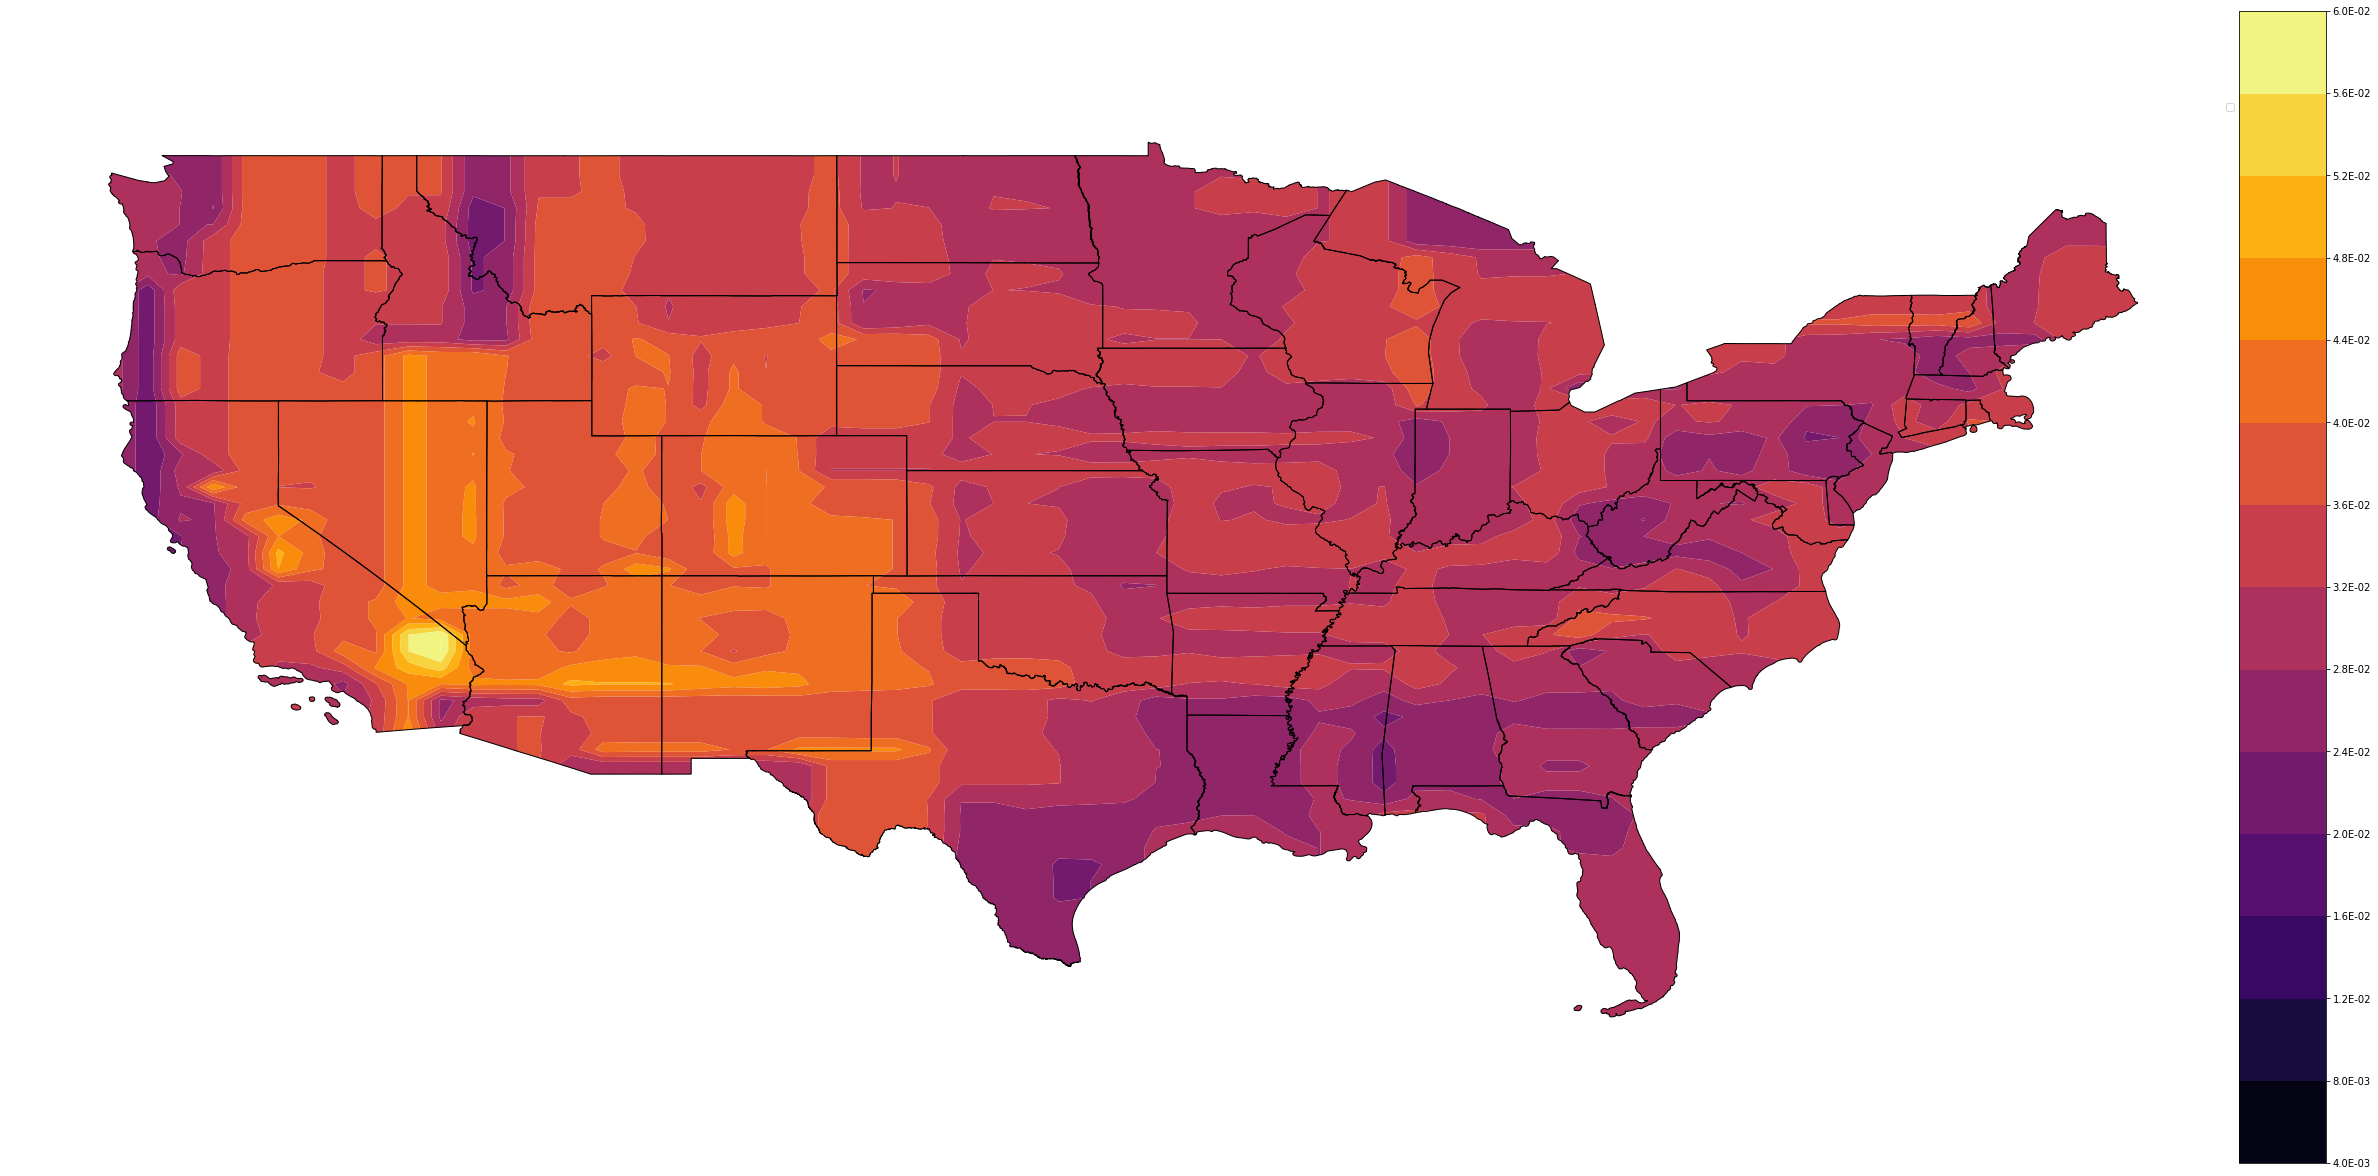

In [5]:
interpolPlot(df, shape_df, long, lat, pollutant)
plt.show()

Focusing on Califonria.

In [6]:
shape_df = shape_df[13:14]

We don't support `LinearSegmentedColormap` pass a `ListedColormap`. We will be demoing below how to convert from former to latter.

In [9]:
## This will not work

# interpolPlot(df, shape_df, long, lat, pollutant, cmap='Greens')
# plt.show()

In [7]:
# Converting to ListedColormap

import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

N = 258
cmap_colors = cm.get_cmap('Greens', N)
newcolors = (cmap_colors(np.linspace(0, 1, N))[:, :3]).tolist()
listedcmap = ListedColormap(newcolors, name='GreensListed', N=N)

/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
No handles with labels found to put in legend.


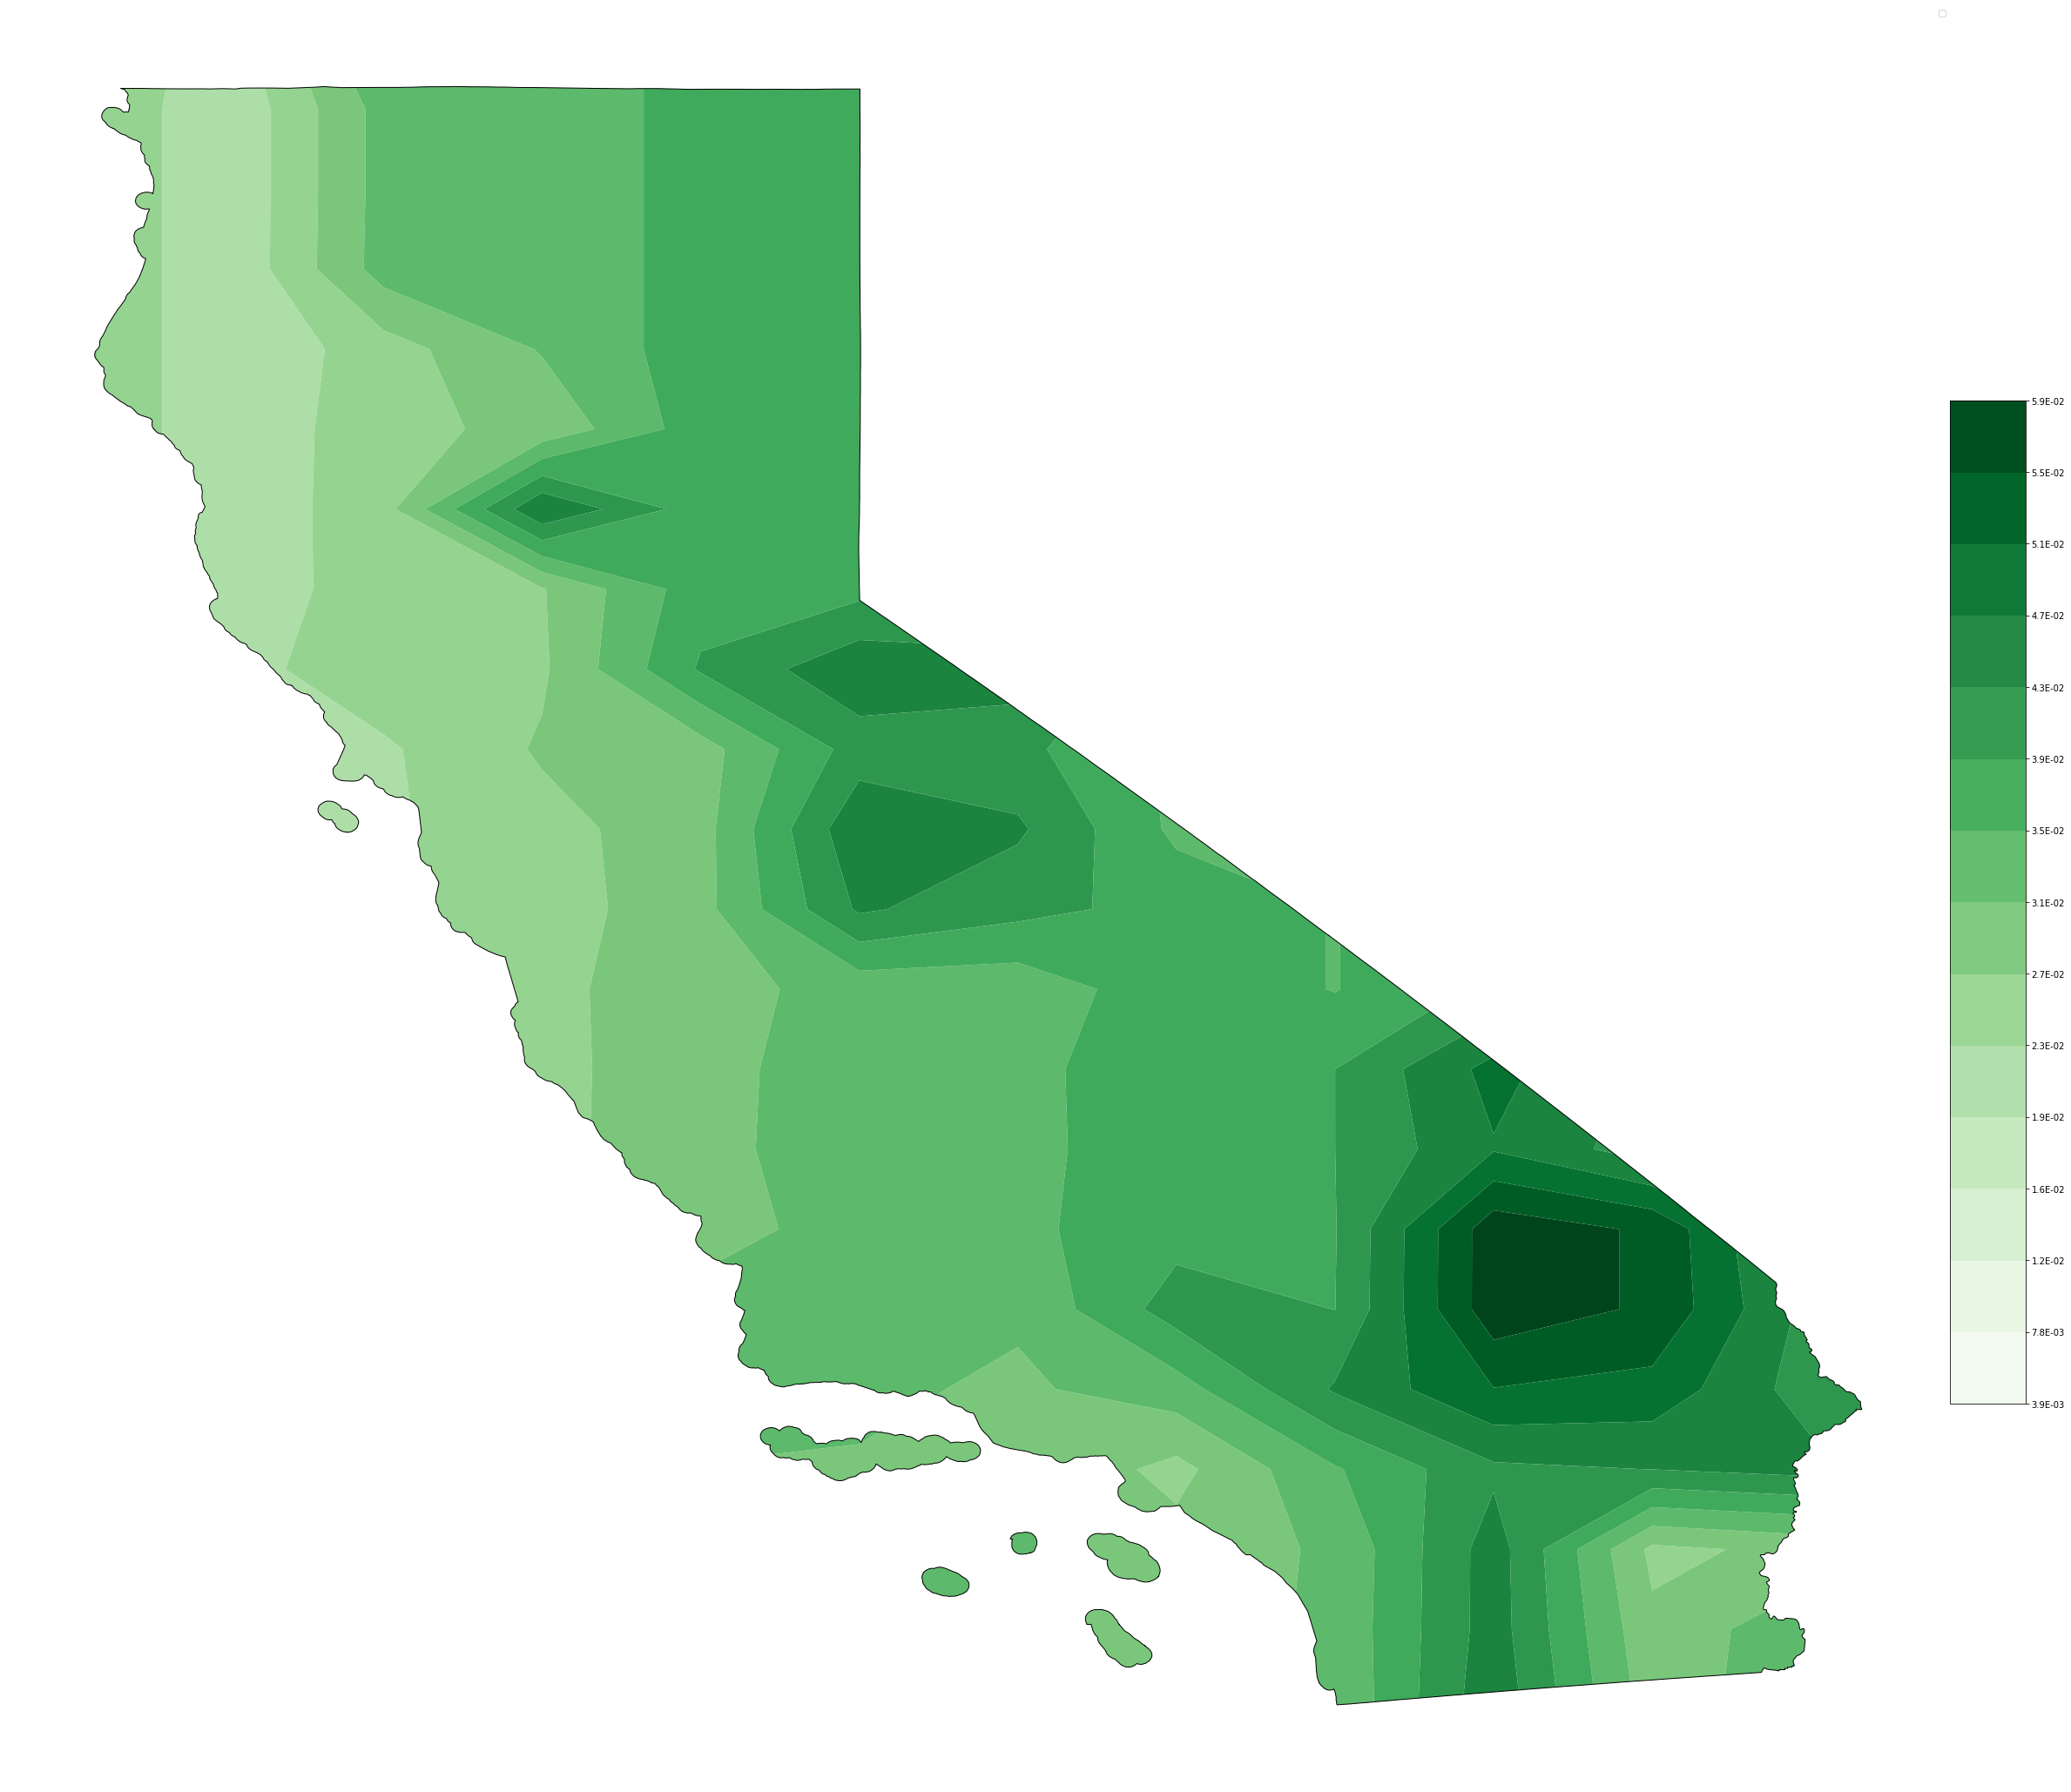

In [8]:
interpolPlot(df, shape_df, long, lat, pollutant, cmap=listedcmap)
plt.savefig("interpolPlot2.png")
plt.show()

### Delhi
Let's have a look at pollution data in delhi.

In [22]:
!ls "../data/shapeFiles/delhi"

'wards delimited.dbf'  'wards delimited.qpj'  'wards delimited.shx'
'wards delimited.prj'  'wards delimited.shp'


In [23]:
shapeFile = "../data/shapeFiles/delhi/wards delimited.shp"
shape_df = GeoDataFrame.from_file(shapeFile)
datafile = "../data/delhi_1_5_Aug.csv"
df = pd.read_csv(datafile)
df.head()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,"Rohini, Delhi - DPCC",Delhi,IN,2019-08-04T18:30:00.000Z,2019-08-05T00:00:00+05:30,pm25,105.00,µg/m³,28.732528,77.119920,"[{""name"":""Central Pollution Control Board"",""ur..."
1,"CRRI Mathura Road, Delhi - IMD",Delhi,IN,2019-08-04T18:30:00.000Z,2019-08-05T00:00:00+05:30,pm25,57.16,µg/m³,28.551201,77.273574,"[{""name"":""Central Pollution Control Board"",""ur..."
2,"Aya Nagar, Delhi - IMD",Delhi,IN,2019-08-04T18:30:00.000Z,2019-08-05T00:00:00+05:30,pm25,26.96,µg/m³,28.470691,77.109936,"[{""name"":""Central Pollution Control Board"",""ur..."
3,"IGI Airport (T3), Delhi - IMD",Delhi,IN,2019-08-04T18:30:00.000Z,2019-08-05T00:00:00+05:30,pm25,0.00,µg/m³,28.562776,77.118005,"[{""name"":""Central Pollution Control Board"",""ur..."
4,"ITO, Delhi - CPCB",Delhi,IN,2019-08-04T18:30:00.000Z,2019-08-05T00:00:00+05:30,pm25,79.00,µg/m³,28.631695,77.249439,"[{""name"":""Central Pollution Control Board"",""ur..."


In [24]:
# some_value = '2019-07-31'
# df = df.loc[df['local'].str.contains(some_value, regex=False)] # selecting one date

In [25]:
locations = pd.unique(df.location)
dff = []
for location in locations:
    mask = df['location'] == location
    mean = df[mask].value.mean()
    latitude = df[mask].latitude.mean()
    longitude = df[mask].longitude.mean()
    dff.append([latitude, longitude, mean])

In [26]:
df = pd.DataFrame(dff, columns=[lat, long, pollutant])
df.head()

,Latitude,Longitude,Arithmetic Mean
0,28.732528,77.119920,44.351852
1,28.551200,77.273574,40.303049
2,28.470691,77.109936,30.352877
3,28.562776,77.118005,37.718022
4,28.631694,77.249439,46.991979


/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/geopandas/base.py:35: UserWarning: GeoSeries crs mismatch: {'init': 'epsg:4326'} and {'init': 'epsg:4269'}
  right.crs))
/home/apoorv/Desktop/github/.env/lib/python3.6/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!({'init': 'epsg:4269'} != {'init': 'epsg:4326'})
  '(%s != %s)' % (left_df.crs, right_df.crs))


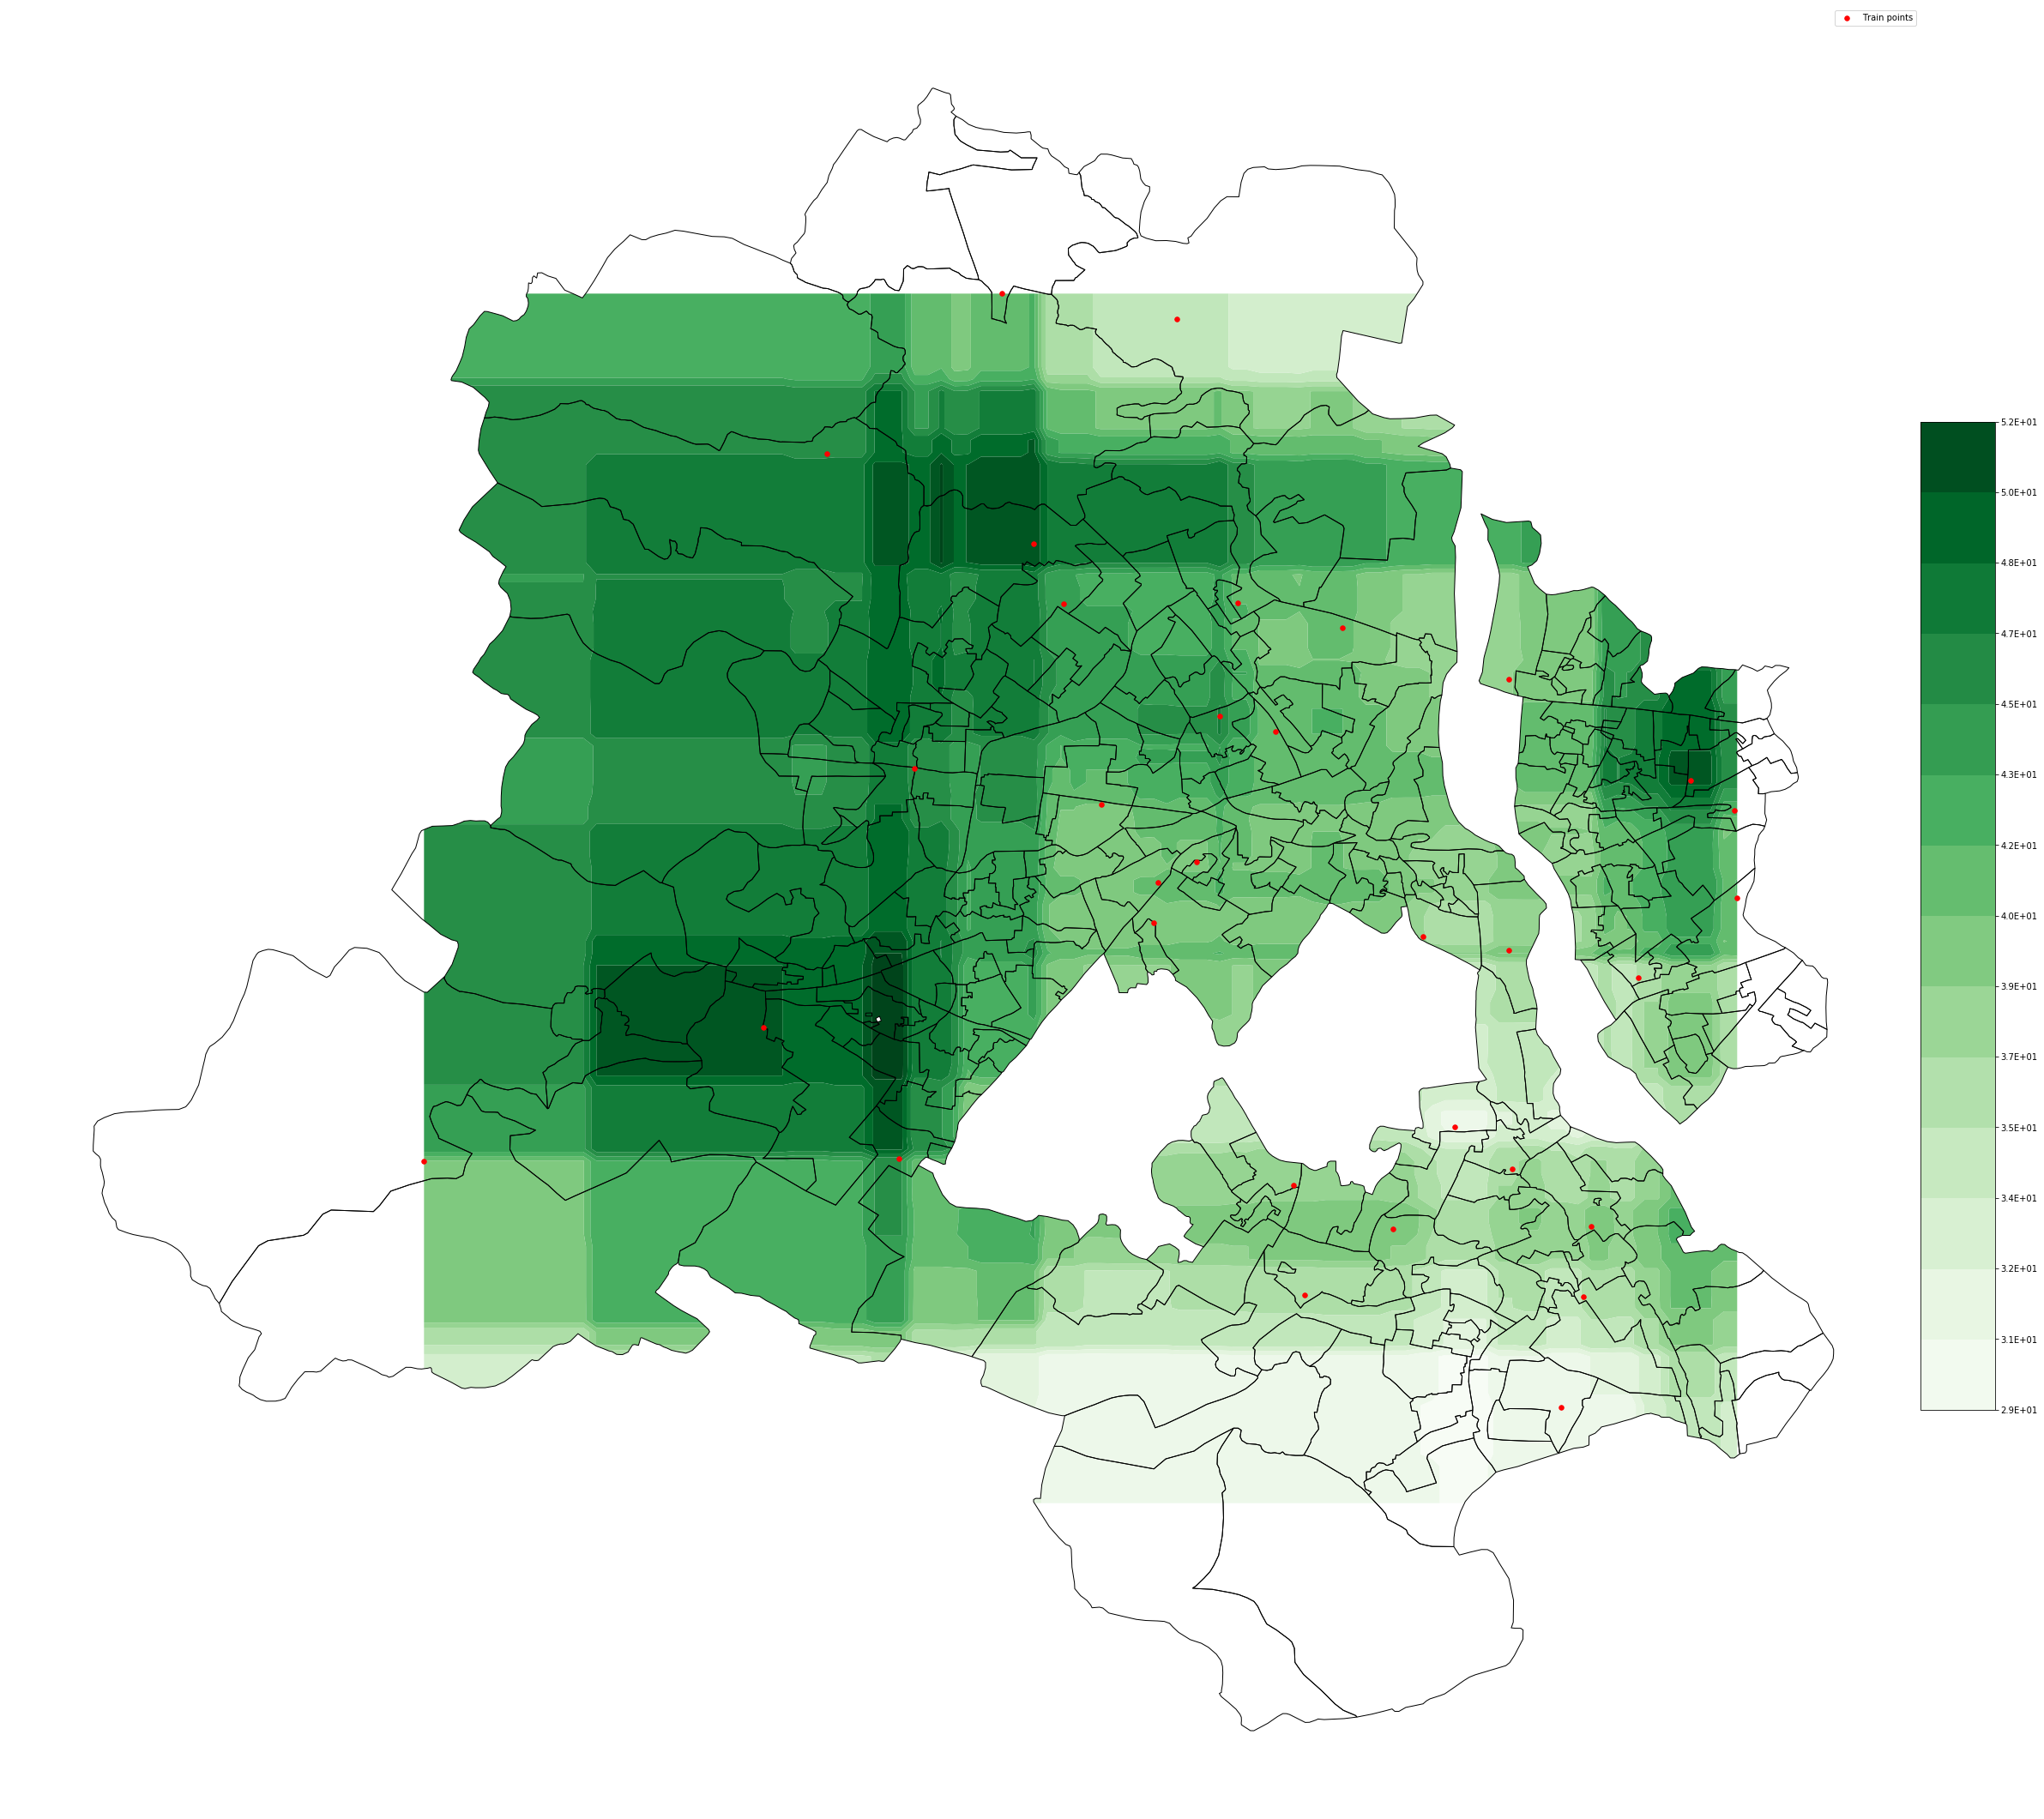

In [29]:
interpolPlot(df, shape_df, long, lat, pollutant, 
             cmap=listedcmap, plot_train_points=True,
             markersize=30)
# plt.savefig("interpolPlot3.png")
plt.show()

In [14]:
import json

In [15]:
!curl https://api.openaq.org/v1/measurements?city=Delhi > ../re/test.json
with open('../re/test.json', 'r') as f:
    data = json.load(f)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 25817  100 25817    0     0  24919      0  0:00:01  0:00:01 --:--:-- 24919


In [17]:
df = pd.DataFrame(data['results'])
df.head()

,location,parameter,date,value,unit,coordinates,country,city
0,"IGI Airport (T3), Delhi - IMD",pm25,"{'utc': '2019-09-23T19:45:00.000Z', 'local': '...",32.88,µg/m³,"{'latitude': 28.5627763, 'longitude': 77.1180053}",IN,Delhi
1,"IGI Airport (T3), Delhi - IMD",pm10,"{'utc': '2019-09-23T19:45:00.000Z', 'local': '...",62.71,µg/m³,"{'latitude': 28.5627763, 'longitude': 77.1180053}",IN,Delhi
2,"IGI Airport (T3), Delhi - IMD",no2,"{'utc': '2019-09-23T19:45:00.000Z', 'local': '...",34.60,µg/m³,"{'latitude': 28.5627763, 'longitude': 77.1180053}",IN,Delhi
3,"IGI Airport (T3), Delhi - IMD",co,"{'utc': '2019-09-23T19:45:00.000Z', 'local': '...",720.00,µg/m³,"{'latitude': 28.5627763, 'longitude': 77.1180053}",IN,Delhi
4,"IGI Airport (T3), Delhi - IMD",o3,"{'utc': '2019-09-23T19:45:00.000Z', 'local': '...",10.56,µg/m³,"{'latitude': 28.5627763, 'longitude': 77.1180053}",IN,Delhi
